In [171]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
#utilizado para manejos de directorios y rutas
import os

#Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
import csv
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Librerias para graficación
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

#llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [173]:
#Cargar y leer datos
import pandas as pd
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/SIS420/DataSet/datasetBubbleTea.xlsx', index_col=0)
print(data)
print(data.shape)
data_top=data.head()
data.head()
#data = np.loadtxt('/content/gdrive/MyDrive/Colab Notebooks/SIS420/DataSet/datasetBubbleTea.xlsx', delimiter=",",skiprows=1)
#print(data)
X = data[['Cantidad']]
#df['TOTAL']

print(X)
y = data['Total']
print(y)
m = y.size
#for i in range(26):
 #   print('{:8.0f}{:10.0f}'.format(X[i], y[i]))

           Con Tapioca? Tipo de Bubble Tea  Costo/unidad  Cantidad   Total
Num Pedido                                                                
51                   no             Blanco         18.23         2   36.46
8                    si             Oolong         22.89         5  114.45
5                    no             Matcha         29.72         4  118.88
20                   no        Aromatizado         18.78         5   93.90
25                   no              Verde         21.61         2   43.22
30                   si       Massala Chai         24.31         3   72.93
3                    si              Puerh         17.20         1   17.20
37                   no              Negro         27.89         2   55.78
55                   no       Matcha Kyoto         22.96         5  114.80
49                   si           Fusionka         25.32         2   50.64
14                   no             Jasmin         28.42         4  113.68
6                    no  

In [174]:
#definicion de funcion que grafica los puntos x & y
def plotData(x, y):
    #abre una nueva figura
    fig = pyplot.figure()  
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Cantidad')
    pyplot.xlabel('Costo Bubble Tea 1,000s')

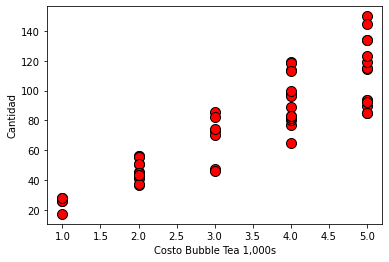

In [175]:
plotData(X, y)

In [176]:
x = np.concatenate([X, X * X],axis=1)
a=x[:56]
print(a)
b=x[56:]
print(b)

X=np.concatenate((a,b),axis=0)


[[ 2  4]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 2  4]
 [ 3  9]
 [ 1  1]
 [ 2  4]
 [ 5 25]
 [ 2  4]
 [ 4 16]
 [ 2  4]
 [ 5 25]
 [ 3  9]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 2  4]
 [ 2  4]
 [ 3  9]
 [ 2  4]
 [ 1  1]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 5 25]
 [ 3  9]
 [ 5 25]
 [ 1  1]
 [ 1  1]
 [ 2  4]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 4 16]
 [ 4 16]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 1  1]
 [ 5 25]
 [ 2  4]
 [ 2  4]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 3  9]
 [ 3  9]
 [ 2  4]
 [ 1  1]
 [ 4 16]
 [ 5 25]
 [ 5 25]]
[]


In [177]:
print(X)

[[ 2  4]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 2  4]
 [ 3  9]
 [ 1  1]
 [ 2  4]
 [ 5 25]
 [ 2  4]
 [ 4 16]
 [ 2  4]
 [ 5 25]
 [ 3  9]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 2  4]
 [ 2  4]
 [ 3  9]
 [ 2  4]
 [ 1  1]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 5 25]
 [ 3  9]
 [ 5 25]
 [ 1  1]
 [ 1  1]
 [ 2  4]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 4 16]
 [ 4 16]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 1  1]
 [ 5 25]
 [ 2  4]
 [ 2  4]
 [ 5 25]
 [ 4 16]
 [ 5 25]
 [ 2  4]
 [ 4 16]
 [ 4 16]
 [ 3  9]
 [ 3  9]
 [ 2  4]
 [ 1  1]
 [ 4 16]
 [ 5 25]
 [ 5 25]]


In [178]:
#definicion de funcion que calcula la desviacion estandar
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis =0 )
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [179]:
#llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

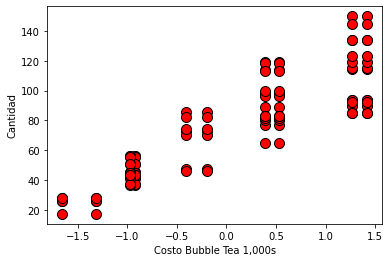

In [180]:
plotData(X_norm, y)

In [181]:
#Añade el termino de interseccion a X
#(Columna de 1's para X0)
X = np.concatenate([np.ones((m, 1)), X_norm],axis=1)
print(X)

[[ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.          0.53472702  0.39230965]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -1.65634954 -1.31515203]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          0.53472702  0.39230965]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          0.53472702  0.39230965]
 [ 1.          0.53472702  0.39230965]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -1.65634954 -1.31515203]
 [ 1.          1.26508587  1.41678666]
 [ 1.          0.53472702  0.39230965]
 [ 1.          1.26508587  1.41678666]
 [ 1.          1.26508587

In [182]:
#definicion de funcion para calcular el costo
def computeCostMulti(X, y, theta):
    #Inicializa algunos valores que seran utiles
    m = y.shape[0] #numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [183]:
#definicion de funcion para calcular el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente: [75.1525     21.73951589  8.77625491]
El costo para 6 bubble tea es de: $951


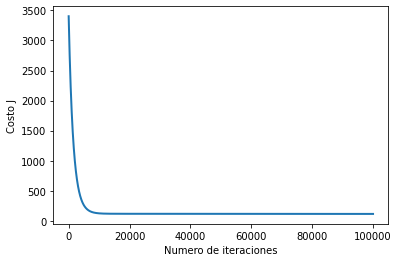

In [170]:
#Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0003
num_iters = 100000

#inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

#Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#El costo para 6 bubble tea
X_array = [6, 27, 136]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El costo para 6 bubble tea es de: ${:.0f}'.format(price))

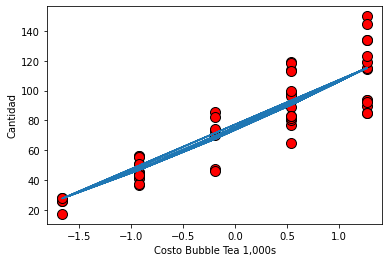

In [184]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')